In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *


In [2]:
emi_com = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")
temp = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp.csv")


In [3]:
# Cleaning oil data every time code: 

emi_com['Date'] = pd.to_datetime(emi_com['Date'])



In [4]:
temp.drop('Unnamed: 0', axis=1, inplace=True)
temp.rename(columns={'date': 'Date'}, inplace=True) 
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)
temp = temp[temp.index.year >= 1973]
temp['anomaly_squared'] = temp['anomaly'] ** 2



In [6]:
df = pd.merge(temp, emi_com, on='Date', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19253 entries, 0 to 19252
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19253 non-null  datetime64[ns]
 1   anomaly                        19253 non-null  float64       
 2   anomaly_squared                19253 non-null  float64       
 3   Unnamed: 0                     19253 non-null  int64         
 4   Consumption (quadrillion Btu)  19253 non-null  float64       
 5   Energy Type                    19253 non-null  object        
 6   Energy Class                   19253 non-null  object        
 7   Sector                         19253 non-null  object        
 8   Emission (Mton Co2)            19253 non-null  float64       
 9   Emission per Consumption       18716 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [7]:
df

,Date,anomaly,anomaly_squared,Unnamed: 0,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,-0.478,0.228484,0,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,1973-01-01,-0.478,0.228484,15083,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,1973-01-01,-0.478,0.228484,18749,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,1973-01-01,-0.478,0.228484,14472,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,1973-01-01,-0.478,0.228484,13861,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...,...,...
19248,2016-05-01,0.186,0.034596,12548,0.024190,Lubricants,Petroleum,Transportation,0.490,20.255923
19249,2016-05-01,0.186,0.034596,1742,0.127796,Total,Petroleum,Residential,3.789,29.648920
19250,2016-05-01,0.186,0.034596,10715,0.003855,Aviation Gasoline,Petroleum,Transportation,0.121,31.387758
19251,2016-05-01,0.186,0.034596,11937,0.541844,Jet Fuel,Petroleum,Transportation,20.033,36.971895


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19253 entries, 0 to 19252
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19253 non-null  datetime64[ns]
 1   anomaly                        19253 non-null  float64       
 2   anomaly_squared                19253 non-null  float64       
 3   Unnamed: 0                     19253 non-null  int64         
 4   Consumption (quadrillion Btu)  19253 non-null  float64       
 5   Energy Type                    19253 non-null  object        
 6   Energy Class                   19253 non-null  object        
 7   Sector                         19253 non-null  object        
 8   Emission (Mton Co2)            19253 non-null  float64       
 9   Emission per Consumption       18716 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,-0.478,0.228484,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,1973-01-01,-0.478,0.228484,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,1973-01-01,-0.478,0.228484,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,1973-01-01,-0.478,0.228484,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,1973-01-01,-0.478,0.228484,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...,...
19248,2016-05-01,0.186,0.034596,0.024190,Lubricants,Petroleum,Transportation,0.490,20.255923
19249,2016-05-01,0.186,0.034596,0.127796,Total,Petroleum,Residential,3.789,29.648920
19250,2016-05-01,0.186,0.034596,0.003855,Aviation Gasoline,Petroleum,Transportation,0.121,31.387758
19251,2016-05-01,0.186,0.034596,0.541844,Jet Fuel,Petroleum,Transportation,20.033,36.971895


<Axes: xlabel='anomaly', ylabel='Emission per Consumption'>

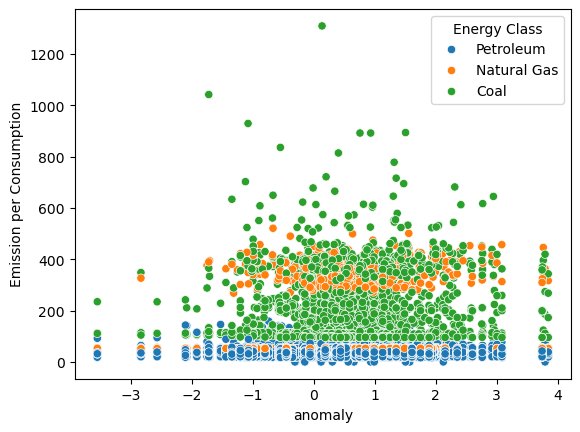

In [15]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly"], hue=df['Energy Class'])

<Axes: xlabel='anomaly_squared', ylabel='Emission per Consumption'>

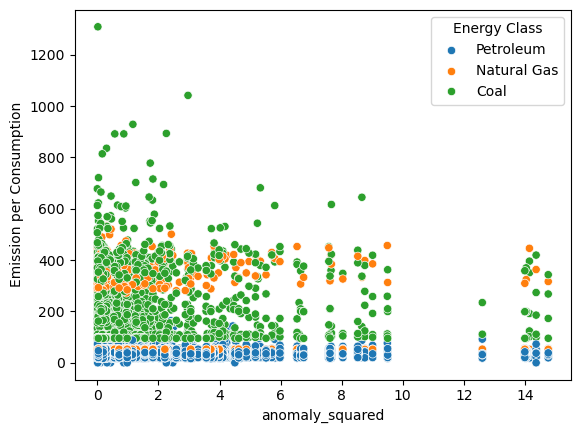

In [16]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly_squared"], hue=df['Energy Class'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19253 entries, 0 to 19252
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19253 non-null  datetime64[ns]
 1   anomaly                        19253 non-null  float64       
 2   anomaly_squared                19253 non-null  float64       
 3   Consumption (quadrillion Btu)  19253 non-null  float64       
 4   Energy Type                    19253 non-null  object        
 5   Energy Class                   19253 non-null  object        
 6   Sector                         19253 non-null  object        
 7   Emission (Mton Co2)            19253 non-null  float64       
 8   Emission per Consumption       18716 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.3+ MB


<Axes: >

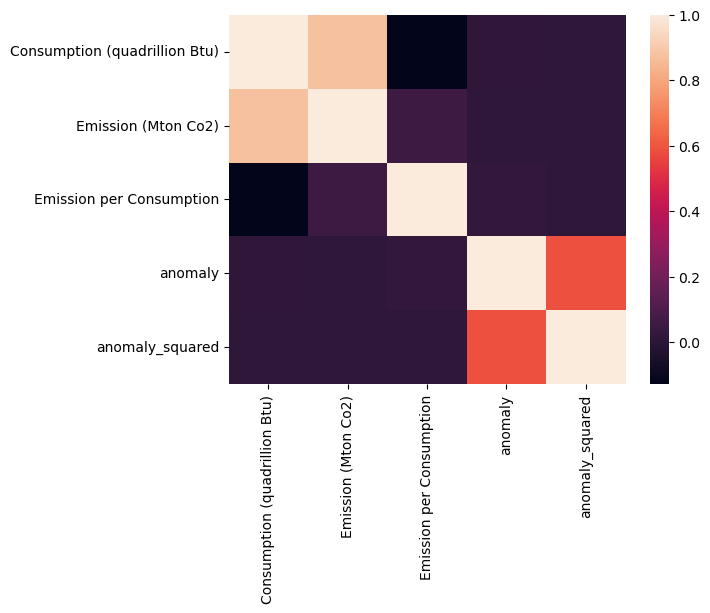

In [19]:
sns.heatmap(df[['Consumption (quadrillion Btu)','Emission (Mton Co2)',	'Emission per Consumption',	'anomaly',	'anomaly_squared']].corr())

<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

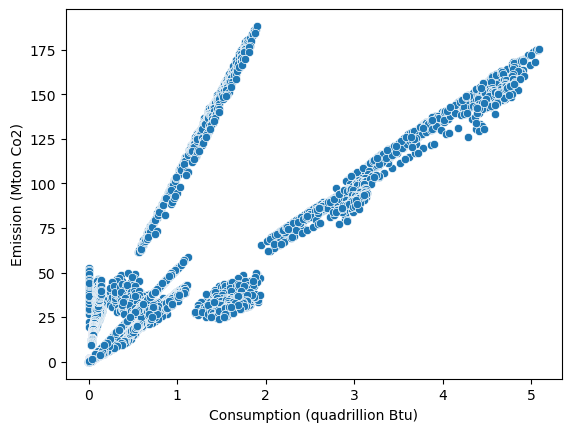

In [21]:
sns.scatterplot(x=df['Consumption (quadrillion Btu)'],y=df['Emission (Mton Co2)'])

In [23]:
sns.lineplot(x='Date', y='anomaly',y=df['Consumption (quadrillion Btu)'], data=temp)


SyntaxError: keyword argument repeated: y (3057231639.py, line 1)

<Axes: xlabel='Date'>

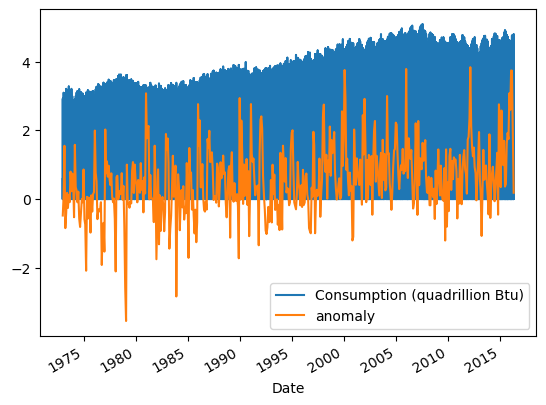

In [27]:
df.plot(x='Date',y=['Consumption (quadrillion Btu)','anomaly'])